![Simulation and Statistical Inference Project cover](https://pbs.twimg.com/media/GwTM3DUWAAARRo2?format=jpg&name=large)


*Image source: [link](https://pbs.twimg.com/media/GwTM3DUWAAARRo2?format=jpg&name=large).*


# Simulation and Statistical Inference Project

This notebook contains four simulation-based problems for the assessment.  
The goal is to use Python (NumPy, SciPy, Matplotlib) to explore some ideas in statistical inference using simulation.

### Lady Tasting Tea — Introduction

In this section, we look at the classic *Lady Tasting Tea* experiment described by Ronald Fisher.

The story is loosely based on a real event. Muriel Bristol, a colleague of Fisher, claimed that she could tell whether milk had been poured into a cup **before** or **after** the tea. Her future husband, William Roach, suggested setting up a simple experiment: give her eight cups of tea, four prepared milk-first and four prepared tea-first, in random order. She would then try to identify which cups were made by each method.

The question Fisher asked was:  
**If she were only guessing, what is the probability she would get her selections correct just by chance?**

In the actual experiment, Muriel Bristol correctly identified all four milk-first cups.

Fisher’s analysis of this test is famous because it was the first time he formally introduced the idea of a **null hypothesis**.  
The null hypothesis (or null model) represents a version of the world where the effect we are testing is set to zero. In this case:

- **Null hypothesis:** Muriel Bristol cannot truly distinguish between milk-first and tea-first cups and is choosing cups randomly.

In Fisher’s setup, there are eight cups in total — four milk-first and four tea-first — and the participant tries to pick the four milk-first cups. Under the null hypothesis, all selections are random, and we can calculate or simulate the probability of getting all four correct by chance.

In this project, we recreate this experiment using Python and simulation to estimate that probability and compare it with the exact combinatorial value.

For a clear description of the original experiment, see the Wikipedia article:  
https://en.wikipedia.org/wiki/Lady_tasting_tea

https://en.wikipedia.org/wiki/Ronald_Fisher


## Problem 1 — Extending the Lady Tasting Tea

In this problem I extend Fisher's Lady Tasting Tea experiment.  
First I look at the original version with 8 cups (4 milk-first, 4 tea-first), and then I change it to 12 cups (4 milk-first, 8 tea-first).

The idea is:
- calculate the exact probability by combinatorics (using `math.comb`),
- then approximate the same probability using simulation with NumPy,
- and finally compare the probabilities and talk about p-values and significance.

Some references I used while studying this problem:

- Explanation of Fisher's tea experiment: <https://lisds.github.io/textbook/wild-pandas/fishers_tea.html>  
- Tea-tasting analysis and code ideas: <https://github.com/e10v/tea-tasting>  
- `math.comb` documentation: <https://docs.python.org/3/library/math.html#math.comb>


https://lisds.github.io/textbook/wild-pandas/fishers_tea.html

https://github.com/e10v/tea-tasting

https://jonykoren.medium.com/lady-tasting-tea-e46f89fbe9e8

https://e10v.me/tea-tasting-analysis-of-experiments/

https://www.kdnuggets.com/2019/05/lady-tasting-tea-science.html




https://docs.python.org/3/library/math.html#math.comb

In [33]:
# Imports for Problem 1

import math              # for combinations like C(n, k)
import numpy as np       # for simulation
import matplotlib.pyplot as plt  # for plots
import ipywidgets as widgets
from IPython.display import display






In the original *Lady Tasting Tea* experiment:

- There are **8 cups** of tea: **4 prepared with milk poured first** and **4 with tea poured first**.  
- The lady’s task is to **correctly identify the 4 cups with milk poured first**.  
- If she is **just guessing randomly**, there are  
  \[
  C(8, 4) = 70
  \]
  possible ways to choose 4 cups out of 8.  

This means that, by chance alone, the probability of her selecting all four correct cups is  
\[
\frac{1}{70} \approx 0.0143
\].


In [34]:
# Original Lady Tasting Tea: 8 cups (4 milk-first, 4 tea-first)

no_cups_8 = 8
no_cups_milk_first_8 = 4
no_cups_tea_first_8 = no_cups_8 - no_cups_milk_first_8

print("Original experiment (8 cups)")
print("Total cups:", no_cups_8)
print("Milk first:", no_cups_milk_first_8)
print("Tea first :", no_cups_tea_first_8)

# Number of ways of selecting 4 cups from 8 (combinations C(8,4))
ways_8 = math.comb(no_cups_8, no_cups_milk_first_8)
prob_exact_8 = 1 / ways_8

print("Number of possible selections (C(8,4)):", ways_8)
print("Exact probability of all correct (8 cups):", prob_exact_8)


Original experiment (8 cups)
Total cups: 8
Milk first: 4
Tea first : 4
Number of possible selections (C(8,4)): 70
Exact probability of all correct (8 cups): 0.014285714285714285


In [35]:
# Extended experiment: 12 cups (4 milk-first, 8 tea-first)

no_cups_12 = 12
no_cups_milk_first_12 = 4
no_cups_tea_first_12 = no_cups_12 - no_cups_milk_first_12

print("Extended experiment (12 cups)")
print("Total cups:", no_cups_12)
print("Milk first:", no_cups_milk_first_12)
print("Tea first :", no_cups_tea_first_12)

# Number of ways of selecting 4 milk-first cups from 12
ways_12 = math.comb(no_cups_12, no_cups_milk_first_12)
prob_exact_12 = 1 / ways_12

print("Number of possible selections (C(12,4)):", ways_12)
print("Exact probability of all correct (12 cups):", prob_exact_12)


Extended experiment (12 cups)
Total cups: 12
Milk first: 4
Tea first : 8
Number of possible selections (C(12,4)): 495
Exact probability of all correct (12 cups): 0.00202020202020202


In [36]:
def simulate_all_correct(no_cups, no_cups_milk_first, n_trials=200_000, seed=42):
    """
    Simula o experimento Lady Tasting Tea.

    Em cada simulação:
    1. Escolhe aleatoriamente quais copos são realmente 'milk first'.
    2. A participante chuta aleatoriamente quais copos são 'milk first',
       sabendo que a quantidade é no_cups_milk_first.
    3. Verifica se ela acertou exatamente o conjunto de copos.
    """
    rng = np.random.default_rng(seed)
    labels = np.arange(no_cups)
    hits = 0

    for _ in range(n_trials):
        # Copos verdadeiros com milk-first
        true_milk = set(rng.choice(labels, size=no_cups_milk_first, replace=False))
        # Palpite da participante (também escolhendo no_cups_milk_first copos)
        guess_milk = set(rng.choice(labels, size=no_cups_milk_first, replace=False))

        if guess_milk == true_milk:
            hits += 1

    return hits / n_trials



In [37]:
# Simulação para o experimento original (8 copos)
sim_prob_8 = simulate_all_correct(
    no_cups=no_cups_8,
    no_cups_milk_first=no_cups_milk_first_8,
    n_trials=200_000,
    seed=1
)

print("Simulated probability (8 cups):", sim_prob_8)
print("Exact probability      (8 cups):", prob_exact_8)



Simulated probability (8 cups): 0.014425
Exact probability      (8 cups): 0.014285714285714285


In [38]:

# Simulação para o experimento extendido (12 copos)
sim_prob_12 = simulate_all_correct(
    no_cups=no_cups_12,
    no_cups_milk_first=no_cups_milk_first_12,
    n_trials=200_000,
    seed=2
)

print("Simulated probability (12 cups):", sim_prob_12)
print("Exact probability      (12 cups):", prob_exact_12)


Simulated probability (12 cups): 0.002
Exact probability      (12 cups): 0.00202020202020202


### Discussion

For the original experiment with 8 cups, the exact probability of getting all 4 milk-first cups correct just by guessing is about 0.014 (1 in 70).  
The simulated probability is very close to this value, so the simulation seems to agree with the combinatorial result.

In hypothesis testing terms, if we use "all cups correct" as the success rule, this probability can be seen as a p-value under the null hypothesis that the participant is just guessing. Since 0.014 is less than 0.05, a perfect result would be considered significant at the 5% level.

For the extended experiment with 12 cups (4 milk-first and 8 tea-first), the exact probability of a perfect guess is about 0.002 (1 in 495). Again the simulated value is very similar. This is an even smaller p-value, below 0.01.

So, with 12 cups, a perfect performance is much more unlikely by chance. This means the experiment becomes "stricter": we could use a smaller significance threshold like 0.01 and still treat a perfect result as strong evidence that the person really has the ability to tell the difference.


In [39]:


def simulate_test(n_cups, n_milk, trials=20000):
    rng = np.random.default_rng()
    labels = np.arange(n_cups)
    hits = 0
    
    for _ in range(trials):
        true_milk = set(rng.choice(labels, size=n_milk, replace=False))
        guess     = set(rng.choice(labels, size=n_milk, replace=False))
        if true_milk == guess:
            hits += 1
    
    exact = 1 / math.comb(n_cups, n_milk)
    sim = hits / trials
    return exact, sim


# -------- BOTÃO 8 CUPS --------
btn_8 = widgets.Button(description="Run 8-cup test", button_style="info")
output_8 = widgets.Output()

def run_8(b):
    output_8.clear_output()  # <-- AQUI LIMPA A SAÍDA
    exact, sim = simulate_test(8, 4)
    with output_8:
        print("Lady Tasting Tea – 8 cups (4 milk-first)")
        print("----------------------------------------")
        print(f"Exact probability:      {exact:.6f}")
        print(f"Simulated probability:  {sim:.6f}")
        print()

btn_8.on_click(run_8)


# -------- BOTÃO 12 CUPS --------
btn_12 = widgets.Button(description="Run 12-cup test", button_style="warning")
output_12 = widgets.Output()

def run_12(b):
    output_12.clear_output()  # <-- AQUI LIMPA A SAÍDA
    exact, sim = simulate_test(12, 4)
    with output_12:
        print("Lady Tasting Tea – 12 cups (4 milk-first)")
        print("-----------------------------------------")
        print(f"Exact probability:      {exact:.6f}")
        print(f"Simulated probability:  {sim:.6f}")
        print()

btn_12.on_click(run_12)


# Display buttons and outputs
display(btn_8, output_8)
display(btn_12, output_12)


Button(button_style='info', description='Run 8-cup test', style=ButtonStyle())

Output()

Button(button_style='warning', description='Run 12-cup test', style=ButtonStyle())

Output()

******************************

---

## Problem 2 — Normal Distribution and Sample vs Population SD

**Objective:**  
Compare the behavior of the sample standard deviation (`ddof=1`) and population standard deviation (`ddof=0`) when sampling from a standard normal distribution.

**Key Concepts:**  
- Sampling variation  
- Bias in estimators  
- The effect of sample size on variability

**Steps:**  
1. Generate multiple samples from a standard normal distribution.  
2. Compute SDs using both `ddof=1` and `ddof=0`.  
3. Visualize the distributions with overlaid histograms.  
4. Interpret the differences and how they change with larger sample sizes.

In [40]:
# Binomial distribution.
import numpy as np

# Plotting.
import matplotlib.pyplot as plt

# Statistics.
import scipy.stats as stats

# Statistical models.
import statsmodels as sm

https://numpy.org/doc/stable/reference/random/generated/numpy.random.binomial.html

In [41]:
# Flip a single fair coin.
np.random.binomial(1, 0.5)

0

In [42]:
# Flip a single coin several times.
flips = np.random.binomial(1, 0.5, 1000)

# Show.
flips

array([1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,

In [43]:
# Count heads.
heads = flips.sum()

# Show.
heads

474

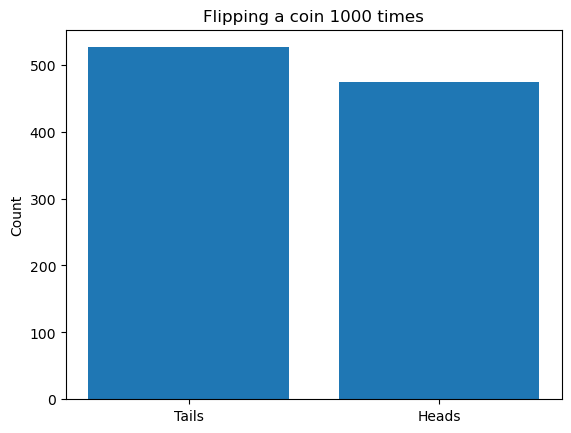

In [44]:
# Create a blank plot.
fig, ax = plt.subplots()

# Create a bar chart.
ax.bar([0, 1], [1000 - heads, heads])

# Add x labels.
ax.set_xticks([0, 1], labels=['Tails', 'Heads'])

# Add title.
ax.set_title('Flipping a coin 1000 times')

# Add axis label.
ax.set_ylabel('Count');

In [45]:
# Flip two coins several times.
twoflips = np.random.binomial(2, 0.5, 1000)

# Show.
twoflips

array([0, 1, 0, 2, 1, 0, 1, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 0, 1, 2, 0,
       1, 1, 2, 1, 0, 1, 1, 2, 1, 1, 0, 0, 1, 1, 1, 2, 0, 2, 0, 1, 1, 0,
       1, 2, 1, 1, 1, 2, 0, 0, 2, 1, 2, 1, 0, 1, 1, 1, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 2, 2, 1, 0, 0, 2, 0, 2, 1, 1, 2, 1, 0, 2, 0, 1, 2, 1,
       2, 0, 1, 2, 2, 1, 1, 0, 2, 0, 1, 1, 1, 0, 1, 2, 1, 1, 0, 2, 2, 0,
       2, 2, 1, 2, 2, 2, 2, 0, 0, 1, 2, 0, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1,
       1, 0, 2, 0, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 0, 2, 2, 1, 1, 0,
       0, 2, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 2, 2, 1, 2, 0, 1, 1, 2,
       1, 2, 1, 0, 0, 0, 0, 2, 0, 2, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 2, 0,
       1, 1, 2, 1, 1, 2, 0, 0, 0, 1, 0, 1, 1, 1, 1, 2, 1, 0, 2, 2, 0, 1,
       0, 1, 2, 1, 1, 0, 0, 0, 0, 2, 1, 0, 0, 2, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1,
       0, 2, 0, 0, 2, 2, 0, 0, 1, 0, 1, 2, 1, 1, 0, 1, 2, 2, 1, 1, 1, 0,
       0, 1, 1, 2, 1, 1, 1, 1, 0, 1, 2, 0, 1, 1, 1,

In [46]:
# Count the number of times each value occurs.
uniques, counts = np.unique(twoflips, return_counts=True)

# Show.
uniques, counts

(array([0, 1, 2]), array([266, 464, 270]))

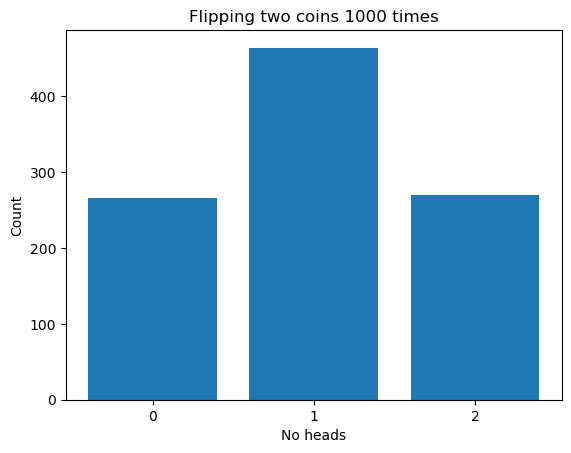

In [47]:
# Create a blank plot.
fig, ax = plt.subplots()

# Create a bar chart.
ax.bar(uniques, counts)

# Set x ticks.
ax.set_xticks(uniques)

# Add title.
ax.set_title('Flipping two coins 1000 times')

# Add axis label.
ax.set_xlabel('No heads')
ax.set_ylabel('Count');

In [48]:
# Flip two coins several times, keeping the individual coin results.
twoflipsind = np.random.binomial(1, 0.5, (1000, 2))

# Show.
twoflipsind

array([[1, 1],
       [0, 0],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]])

In [49]:
import numpy as np

np.random.seed(1)

# Uma amostra pequena
sample = np.random.normal(0, 1, 10)

sd_population = np.std(sample, ddof=0)
sd_sample = np.std(sample, ddof=1)

print("Population SD (ddof=0):", sd_population)
print("Sample SD (ddof=1):    ", sd_sample)


Population SD (ddof=0): 1.190898552063902
Sample SD (ddof=1):     1.2553172955728489


In [50]:


np.random.seed(2)

n = 20              # tamanho da amostra
reps = 2000         # número de repetições

pop_sds = []
samp_sds = []

for _ in range(reps):
    x = np.random.normal(0, 1, n)
    pop_sds.append(np.std(x, ddof=0))
    samp_sds.append(np.std(x, ddof=1))

print("Média Population SD (ddof=0):", np.mean(pop_sds))
print("Média Sample SD (ddof=1):    ", np.mean(samp_sds))


Média Population SD (ddof=0): 0.9638298210133782
Média Sample SD (ddof=1):     0.988868531453835


In [51]:


np.random.seed(3)

def compare(n):
    x = np.random.normal(0, 1, n)
    return np.std(x, ddof=0), np.std(x, ddof=1)

small_n = compare(10)
large_n = compare(1000)

print("Amostra pequena (n=10):")
print("  Population SD:", small_n[0])
print("  Sample SD    :", small_n[1])

print("\nAmostra grande (n=1000):")
print("  Population SD:", large_n[0])
print("  Sample SD    :", large_n[1])


Amostra pequena (n=10):
  Population SD: 0.8664144123449399
  Sample SD    : 0.9132809802021059

Amostra grande (n=1000):
  Population SD: 1.0150114356014142
  Sample SD    : 1.015519322265972


## Problem 3 — Type II Error and t-Tests

**Objective:**  
Simulate the behavior of Type II errors in t-tests as the difference between population means increases.

**Key Concepts:**  
- Type I and Type II errors  
- Power of a statistical test  
- The relationship between effect size and error rates

**Steps:**  
1. Define a range of true mean differences (d = 0 to 1).  
2. Generate two samples for each d.  
3. Perform an independent t-test.  
4. Record how often the null hypothesis is not rejected.  
5. Plot the Type II error rate as a function of d.  
6. Discuss how power increases with effect size.

## Problem 4 — ANOVA vs Multiple t-Tests

**Objective:**  
Compare results from one-way ANOVA with results from multiple two-sample t-tests when analyzing group mean differences.

**Key Concepts:**  
- ANOVA as an omnibus test  
- Multiple comparisons problem  
- Controlling Type I error (family-wise error rate)

**Steps:**  
1. Generate three independent samples from normal distributions with different means.  
2. Run a one-way ANOVA.  
3. Perform pairwise t-tests (with and without correction).  
4. Compare results and conclusions.  
5. Explain why ANOVA is preferred before multiple t-tests.
